## ECGR 4105 - HomeWork 2

In [1]:
# Importing all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Problem # 1

Problem # 1 uses "diabetes.csv" dataset to build a logistic regression binary classifier for positive diabetes. 80% and 20% split will be used between training and evaluation(test). 

In [3]:
# Importing the dataset as a DataFrame
df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# Defining the Independent and Dependent Variables
X = df.values[:,:8]
Y = df.values[:,8]

In [5]:
# MinMax and Standard Scaling as part of Data Preprocessing
Min_Max_Scaling = MinMaxScaler()
X = Min_Max_Scaling.fit_transform(X)

Standard_Scaling = StandardScaler()
X = Standard_Scaling.fit_transform(X)

In [6]:
# Splitting the Data into Training and Validation(Test) set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [7]:
# Logistic Regression
Log_Regression = LogisticRegression(random_state = 0)
Log_Regression.fit(X_train, Y_train)
Y_Prediction = Log_Regression.predict(X_test)

In [8]:
# Genration of a Confusion Matrix for Evaluating accuracy
Confusion_Matrix = confusion_matrix(Y_test, Y_Prediction)
Confusion_Matrix

array([[98,  9],
       [18, 29]], dtype=int64)

In [9]:
# Evaluation of the model using Accuracy, Precision, & Recall
Accuracy = metrics.accuracy_score(Y_test, Y_Prediction)
Precision = metrics.precision_score(Y_test, Y_Prediction)
Recall = metrics.recall_score(Y_test, Y_Prediction)

In [10]:
print("Accuracy = ", Accuracy)
print("Precision = ", Precision)
print("Recall = ", Recall)

Accuracy =  0.8246753246753247
Precision =  0.7631578947368421
Recall =  0.6170212765957447


In [11]:
import seaborn as sns

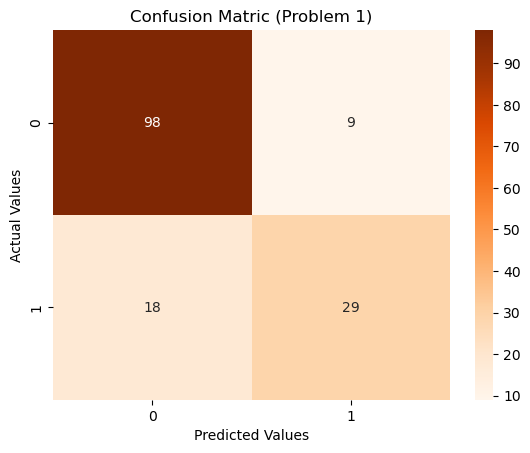

In [12]:
# Plotting the Binary Classifier Model
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names);
plt.yticks(tick_marks, class_names);

# Representation of the Binary Classifier using a Confusion Matrix
sns.heatmap(pd.DataFrame(Confusion_Matrix), annot = True, cmap = "Oranges", fmt = "g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matric (Problem 1)");

## Problem # 2

A repetation of previous problem with the use of K-fold Cross-Validation for training and validation data set. The training will be performed twice with K = 5 and K = 10.

In [13]:
# K-fold Cross-Validation for Training and Validation
Kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)
model = LogisticRegression(solver = "liblinear")
results = cross_val_score(model, X, Y, cv = Kfold)

print("Accuracy = ", results.mean())

Accuracy =  0.7760037348272643


In [14]:
# K-fold Cross-Validation for Training and Validation
Kfold = KFold(n_splits = 10, random_state = 0, shuffle = True)
model = LogisticRegression(solver = "liblinear")
results = cross_val_score(model, X, Y, cv = Kfold);

print("Accuracy = ", results.mean())

Accuracy =  0.7760423786739576
